In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
csv = pd.read_csv('plots.csv')

In [3]:
csv

,ED,MH_CASC,D,MH
0,13.57,73.79,8.0,66.63
1,18.86,75.23,16.0,73.53
2,26.18,76.06,32.0,75.03
3,37.19,76.29,64.0,75.82
4,47.21,76.44,128.0,76.30
5,64.79,76.53,NaN,NaN
6,94.32,76.56,NaN,NaN


In [35]:
ff=[65.86,
73.10,
74.68,
75.45,
75.47,
75.78,
76.30]

mh=[67.46,
73.80,
75.26,
76.17,
76.46,
76.66,
76.82]

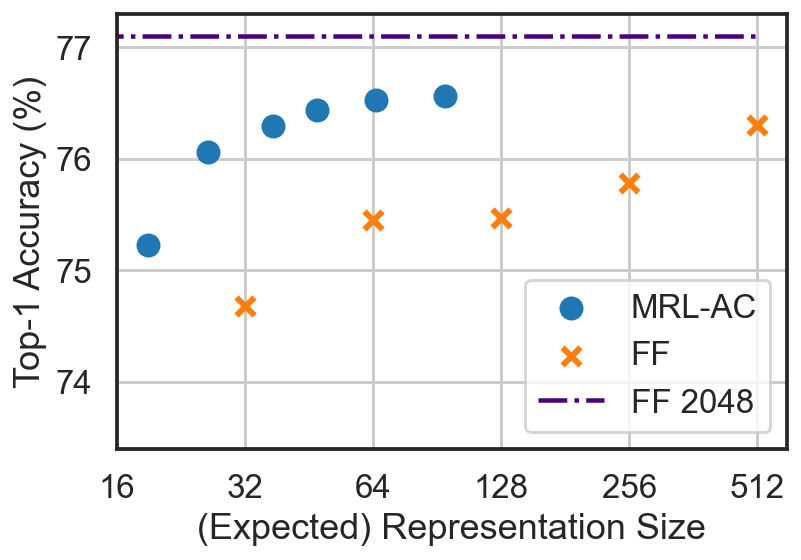

In [44]:
sns.set_context('talk')
sns.set_style("white")
plt.ylim(73.4, 77.3)
plt.xlim(16, 600)
plt.scatter(csv["ED"], csv["MH_CASC"], label="MRL-AC", marker="o", linewidth=3, linestyle='-', zorder=30)
# plt.scatter([2**i for i in range(4, 10)], mh[1:], label="MRL", marker="x", linewidth=3, zorder=30)
plt.scatter([2**i for i in range(4, 10)], ff[1:], label="FF", marker="x", linewidth=3, zorder=30)
plt.hlines(77.1, 0, 512, linestyles='-.', label='FF 2048', colors='indigo')
plt.xscale("log")
plt.xticks([2**i for i in range(4, 10)][:], [2**i for i in range(4, 10)][:], rotation=0)
plt.xlabel("(Expected) Representation Size")
plt.ylabel("Top-1 Accuracy (%)")
plt.grid()
plt.legend(loc=4)
plt.savefig("CASCADE-vs-MRL.pdf", bbox_inches="tight")

(0.0, 1.0)

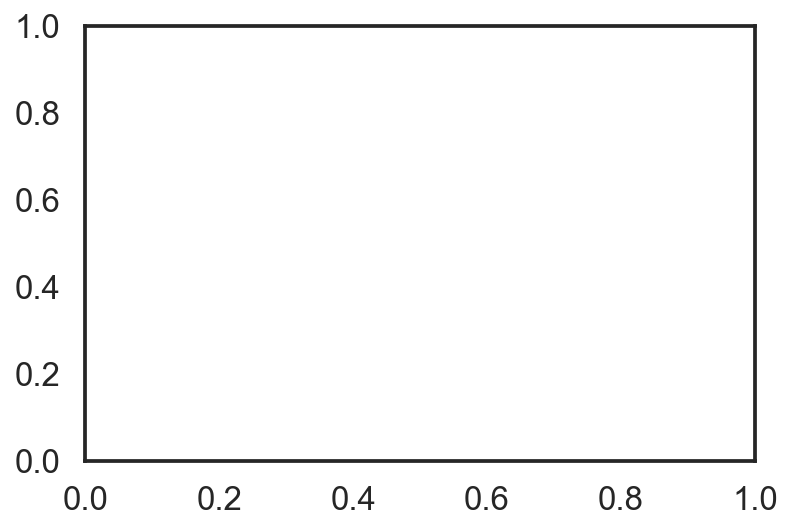

In [ ]:
import numpy as np

names = {
    "BERT-NRL": "MRL",
    "BERT-FF": "Fixed Feature"
}
sns.set_context('talk')
sns.set_style("white")
linestyles = ['-', '--', '-.', ':', "--", "-", ":", "-."]
markers = ['o', '^', 'v', 'h', '+', 'x', 'D', '*']

for i, ((name, mapping), linestyle, m) in enumerate(zip(names.items(), linestyles, markers)):
    print(name)
    if name == "MRL":
        zorder = 30
    else:
        zorder = 2
    plt.plot(
        csv["Representation Size"], 100*csv[name], label=mapping, marker=m, linewidth=3, linestyle=linestyle, zorder=zorder
    )

# plt.ylim([40, 100])
plt.xscale("log")
plt.xticks(csv["Representation Size"], csv["Representation Size"], rotation=45)
plt.xlabel("Representation Size")
plt.ylabel("Top 1 MLM Accuracy (%)")
plt.grid()
plt.legend(loc=4)

plt.savefig("BERT_MLM-dim-x-acc.pdf", bbox_inches="tight")